# Importing libraries

In [ ]:
!git clone -b v0.1 https://github.com/lcsferdinand/cryptocurrency-project.git

#Colab-friendly Directory

import os
import warnings
warnings.filterwarnings("ignore")
BASE_DIR = '/content/cryptocurrency-project'
os.chdir(BASE_DIR)

!pip install -r requirements.txt

MODULE_DIR = BASE_DIR+'/module' #'/content/cryptocurrency-project/module'
os.chdir(MODULE_DIR)
from data_prep import *
from utils_func import *
from model import *
from backtesting import *
os.chdir(BASE_DIR)

In [1]:
os.chdir('G:\cryptocurrency-project\module')
from data_prep import *
from utils_func import *
from model import *
from backtesting import *

In [142]:
df_violation = pd.read_csv('G:\cryptocurrency-project\data\VaR Violation - Normal VaR.csv')
v_dict = {}
conf_lv_dict = {}
conf_lv = 1-df_violation/10000
for coin in ['BTC','USDT','BNB','ETH']:
    for i in [1,5,10]:
        for j in range(len(df_violation)):
            # for k in ['AR(1)-GARCH(1,1)','AR(1)-GARCH(1,1)-SVR','AR(1)-GJR-GARCH(1,1)','AR(1)-GJR-GARCH(1,1)-SVR']:
            v_dict['kupiec_data_%s_%s_%s'%(coin,i,j)] = pd.Series(np.concatenate((np.ones(df_violation['%s_VaR_%s'%(coin,i)][j]), 
                                    np.zeros(10000-df_violation['%s_VaR_%s'%(coin,i)][j])))).astype(int)#,1: conf_lv['%s_VaR_%s'%(coin,i)][j]}
            conf_lv_dict['kupiec_data_%s_%s_%s'%(coin,i,j)] = conf_lv['%s_VaR_%s'%(coin,i)][j]

In [143]:
df = pd.DataFrame({'val':pd.Series(v_dict),'cf':pd.Series(conf_lv_dict)})

# df = pd.DataFrame({'val':pd.Series(v_dict),'cf':pd.Series(conf_lv_dict)})
backtest = risk()
backtest_result = {}
for i in range(len(df)):
    print(df['val'][i])
    print(df['cf'][i])
    print('--------------')
    backtest_result[df.index[i]] = backtest.kupiec_test(df['val'][i],var_conf_level=df['cf'][i],conf_level= 0.95)

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.99
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.9914
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.99
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.9903
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.95
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.954
--------------
0       1
1       1
2       1
3       1
4      

G:\cryptocurrency-project\module\backtesting.py:125: RuntimeWarning: invalid value encountered in double_scalars
  V = -2*(np.log(num1/den1))


In [148]:
v_dict['kupiec_data_BTC_5_0'].value_counts()

0    9500
1     500
dtype: int64

In [137]:
1000/10000

0.1

In [147]:
backtest.kupiec_test(v_dict['kupiec_data_BTC_5_0'],var_conf_level=0.95)#df['cf'][0])
# backtest.

G:\cryptocurrency-project\module\backtesting.py:125: RuntimeWarning: invalid value encountered in double_scalars
  V = -2*(np.log(num1/den1))


{'statictic test': nan,
 'chi square value': nan,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Reject H0'}

In [144]:
df = pd.DataFrame({'val':pd.Series(v_dict),'cf':pd.Series(conf_lv_dict)})
backtest = risk()
backtest_result = {}
for i in range(len(df)):
    print(df['val'][i])
    print(df['cf'][i])
    print('--------------')
    backtest_result[df.index[i]] = backtest.kupiec_test(df['val'][i],var_conf_level=df['cf'][i],conf_level= 0.95)


# for k,v in v_dict.items():
#     # for i, l in v_dict.items().items()
#     # for i, j in v.items():
#     print(k)
#     print('-------------')
    

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.99
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.9914
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.99
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.9903
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.95
--------------
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32
0.954
--------------
0       1
1       1
2       1
3       1
4      

In [145]:
backtest_result

{'kupiec_data_BTC_1_0': {'statictic test': -0.0,
  'chi square value': 0.0,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Fail to reject H0'},
 'kupiec_data_BTC_1_1': {'statictic test': -0.0,
  'chi square value': 0.0,
  'null hypothesis': 'Probability of failure is 0.009',
  'result': 'Fail to reject H0'},
 'kupiec_data_BTC_1_2': {'statictic test': -0.0,
  'chi square value': 0.0,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Fail to reject H0'},
 'kupiec_data_BTC_1_3': {'statictic test': -0.0,
  'chi square value': 0.0,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Fail to reject H0'},
 'kupiec_data_BTC_5_0': {'statictic test': nan,
  'chi square value': nan,
  'null hypothesis': 'Probability of failure is 0.05',
  'result': 'Reject H0'},
 'kupiec_data_BTC_5_1': {'statictic test': nan,
  'chi square value': nan,
  'null hypothesis': 'Probability of failure is 0.046',
  'result': 'Reject H0'},
 'kupiec_data_BTC_5_2': {'

In [36]:
list(v_dict.items())[1][1]

0.99

In [7]:
test = 1-df_violation/10000
test

,BTC_VaR_1,BTC_VaR_5,BTC_VaR_10,ETH_VaR_1,ETH_VaR_5,ETH_VaR_10,USDT_VaR_1,USDT_VaR_5,USDT_VaR_10,BNB_VaR_1,BNB_VaR_5,BNB_VaR_10
0,0.9900,0.9500,0.9000,0.9900,0.9500,0.9000,0.9900,0.9500,0.9000,0.9900,0.9500,0.9000
1,0.9914,0.9540,0.9026,0.9912,0.9530,0.9003,0.9911,0.9541,0.9064,0.9928,0.9562,0.9056
2,0.9900,0.9500,0.9000,0.9900,0.9500,0.9000,0.9794,0.9320,0.8866,0.9905,0.9517,0.9027
3,0.9903,0.9505,0.9007,0.9920,0.9541,0.9055,0.9905,0.9491,0.8983,0.9906,0.9526,0.8994


In [17]:
v_dict['kupiec_data_BTC_1_0'].value_counts()

1    9900
0     100
dtype: int64

In [29]:
for i, j, k in v_dict.items():
    print(k)

ValueError: not enough values to unpack (expected 3, got 2)

In [6]:
backtest = risk()
backtest.kupiec_test(test1,var_conf_level=0.99)
backtest.V_val

-0.0

In [23]:
v_dict.items()

dict_items([('kupiec_data_BTC_1_0', 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32), ('kupiec_data_BTC_1_1', 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32), ('kupiec_data_BTC_1_2', 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32), ('kupiec_data_BTC_1_3', 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32), ('kupiec_data_BTC_5_0', 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32), ('kupiec_data_BTC_5_1', 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32), ('ku

In [52]:
int(len(v_dict)/2)

48

In [59]:
list(v_dict.items())[95]

('var_conf_ETH_10_3', 0.9055)

In [49]:
len(list(v_dict.items())[0])

2

In [48]:
for i in range (int(len(v_dict)/2)):
    for j in list(v_dict.items()):
        print(list(v_dict.items())[i][1])
        print(list(v_dict.items())[j][1])

TypeError: list indices must be integers or slices, not tuple

In [47]:
print(list(v_dict.items())[0][1])
print(list(v_dict.items())[1][1])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32
0.99


In [24]:
kupiec_result = {}
backtest = risk()
for key, violation in v_dict.items():
    # for k, cf in conf_lv_dict.items():
    kupiec_result[key] = backtest.kupiec_test(violation,)
        

0.99
0.9914
0.99
0.9903
0.95
0.954
0.95
0.9505
0.9
0.9026
0.9
0.9007000000000001
0.99
0.9911
0.9794
0.9905
0.95
0.9541
0.9319999999999999
0.9491
0.9
0.9064
0.8866
0.8983
0.99
0.9928
0.9905
0.9906
0.95
0.9562
0.9517
0.9526
0.9
0.9056
0.9027000000000001
0.8994
0.99
0.9912
0.99
0.992
0.95
0.953
0.95
0.9541
0.9
0.9003
0.9
0.9055
0.99
0.9914
0.99
0.9903
0.95
0.954
0.95
0.9505
0.9
0.9026
0.9
0.9007000000000001
0.99
0.9911
0.9794
0.9905
0.95
0.9541
0.9319999999999999
0.9491
0.9
0.9064
0.8866
0.8983
0.99
0.9928
0.9905
0.9906
0.95
0.9562
0.9517
0.9526
0.9
0.9056
0.9027000000000001
0.8994
0.99
0.9912
0.99
0.992
0.95
0.953
0.95
0.9541
0.9
0.9003
0.9
0.9055
0.99
0.9914
0.99
0.9903
0.95
0.954
0.95
0.9505
0.9
0.9026
0.9
0.9007000000000001
0.99
0.9911
0.9794
0.9905
0.95
0.9541
0.9319999999999999
0.9491
0.9
0.9064
0.8866
0.8983
0.99
0.9928
0.9905
0.9906
0.95
0.9562
0.9517
0.9526
0.9
0.9056
0.9027000000000001
0.8994
0.99
0.9912
0.99
0.992
0.95
0.953
0.95
0.9541
0.9
0.9003
0.9
0.9055
0.99
0.9914
0.99
0.

In [22]:
kupiec_result = {}
backtest = risk()
for key, violation, conf_level  in v_dict.items():
    kupiec_result[key] = backtest.kupiec_test(value)

G:\cryptocurrency-project\module\backtesting.py:122: RuntimeWarning: divide by zero encountered in log
  V = -2*(np.log(num1/den1))
G:\cryptocurrency-project\module\backtesting.py:122: RuntimeWarning: invalid value encountered in double_scalars
  V = -2*(np.log(num1/den1))


In [23]:
kupiec_result

{'kupiec_data_BTC_1_0': {'statictic test': inf,
  'chi square value': 1.0,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Reject H0'},
 'kupiec_data_BTC_1_1': {'statictic test': inf,
  'chi square value': 1.0,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Reject H0'},
 'kupiec_data_BTC_1_2': {'statictic test': inf,
  'chi square value': 1.0,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Reject H0'},
 'kupiec_data_BTC_1_3': {'statictic test': inf,
  'chi square value': 1.0,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Reject H0'},
 'kupiec_data_BTC_5_0': {'statictic test': nan,
  'chi square value': nan,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Reject H0'},
 'kupiec_data_BTC_5_1': {'statictic test': nan,
  'chi square value': nan,
  'null hypothesis': 'Probability of failure is 0.01',
  'result': 'Reject H0'},
 'kupiec_data_BTC_5_2': {'statictic test': nan,
  'chi square va

In [15]:
backtest = risk()
backtest.kupiec_test(v_dict['kupiec_data_BTC_1_3'])#,var_conf_level=0.95, conf_level= 0.99)

{'statictic test': 0.0918227470621847,
 'chi square value': 0.2381274255567954,
 'null hypothesis': 'Probability of failure is 0.01',
 'result': 'Fail to reject H0'}

In [27]:


backtest.kupiec_test(pd.Series([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

{'statictic test': 1.736854538639425,
 'chi square value': 0.8124621284979447,
 'null hypothesis': 'Probability of failure is 0.01',
 'result': 'Fail to reject H0'}

In [11]:
test = v_dict['kupiec_data_BTC_1_0']
rand.shuffle(test)
print(test)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32


In [32]:
rand.shuffle(pd.Series(v_dict['kupiec_data_BTC_1_0']).astype(int))

In [16]:
v_dict['kupiec_data_BTC_1_0']

array([1., 1., 1., ..., 0., 0., 0.])

In [55]:
v_dict['kupiec_data_%s_%s_%s'%(coin,i,j)]

dict_items([('kupiec_data_BTC_1_0', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_1_1', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_1_2', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_1_3', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_5_0', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_5_1', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_5_2', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_5_3', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_10_0', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_10_1', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_10_2', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_BTC_10_3', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_USDT_1_0', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_USDT_1_1', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_USDT_1_2', array([1., 1., 1., ..., 0., 0., 0.])), ('kupiec_data_USDT_1_3', array([1., 

# Bitcoin

In [3]:
crypto = data()
crypto.coin()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
coins data sucessfully generated


╔═══════════════════╗
║ SVR Return        ║
║  -Coin Type: btc  ║
║  -Period: normal  ║
║  -Kernel: linear  ║
╚═══════════════════╝
w coef: [[-1.57393696e-05]]
b coef: [0.25174479] 

Train score: -0.001361601013253555
Test score: -0.01747729059192893 

MSE: 8.360371248812408
MAE: 2.035470150394739
RMSE: 2.8914306577907776
AIC 449.93559511129206
BIC 456.629810172727 



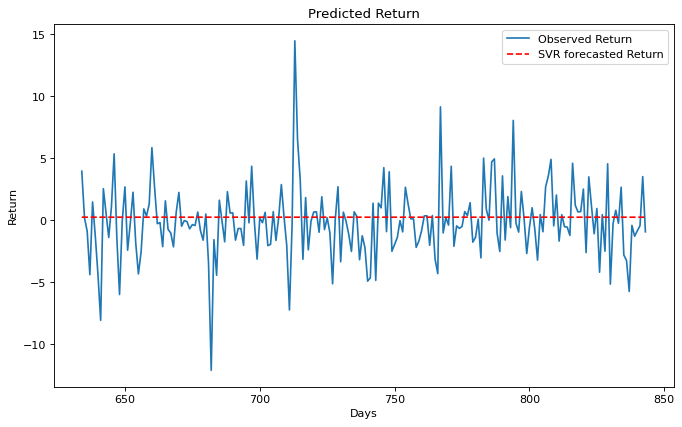

In [4]:
m_btc = model()
m_btc.svr(ret_data = crypto.btc_n[['Return']],
          coins = 'btc',
          period = 'normal',
          kernel = 'linear',
          eps = 0.8767052189058064,
          C=1.2244221205100648e-07, 
          split = True)

╔═══════════════════╗
║ SVR Volatility    ║
║  -Coin Type: btc  ║
║  -Period: normal  ║
║  -Kernel: linear  ║
╚═══════════════════╝
w coef: [[ 9.86317565e-01 -9.30141556e-05]]
b coef: [0.0271913] 

Train score: 0.9991821705307312
Test score: 0.9985133813858675 

MSE: 0.6203346018506275
MAE: 0.4996267808519652
RMSE: 0.7876132311297389
AIC -96.27421588391009
BIC -89.58000082247516 



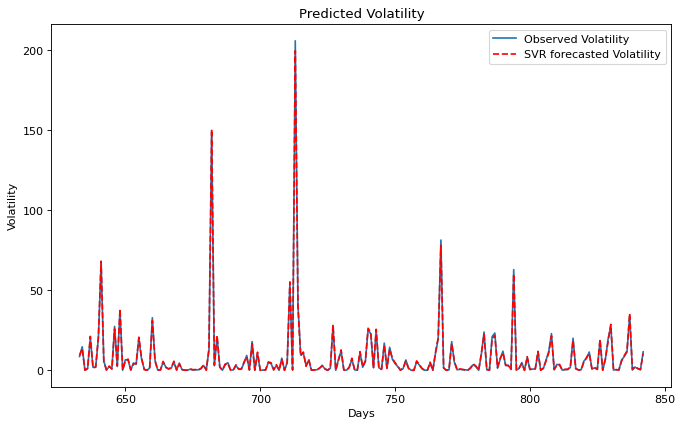

In [5]:
m_btc.svr(ret_data = crypto.btc[['Return']],
          coins = 'btc',
          period = 'normal',
          kernel = 'linear',
          eps = 0.2, 
          split = True, rv = 'v')